In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for data visualiztions

# Read in dataset 1
df = pd.read_csv("../dataset1_cleaned.csv")

In [2]:

from sklearn.model_selection import train_test_split


# --- Preprocessing ---
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(df, columns=categorical_cols)
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ======================================
# Model Training & Evaluation (GridSearchCV for All)


# this is a more advanced way of hyper parameter tuning but gridsearchCV loops through possible hyperparameter combinations 


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Dictionary to store final models and scores
final_models = {}
results = {}

# -----------------------------
# 1. KNN
# -----------------------------
knn_params = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
final_models['KNN'] = knn_grid.best_estimator_
results['KNN'] = knn_grid.best_score_
print(f"KNN Best Params: {knn_grid.best_params_}")

# -----------------------------
# 2. Logistic Regression
# -----------------------------
log_params = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'lbfgs']}

log_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_params, cv=3, n_jobs=-1)
log_grid.fit(X_train_scaled, y_train)
final_models['Logistic Regression'] = log_grid.best_estimator_
results['Logistic Regression'] = log_grid.best_score_
print(f"Logistic Regression Best Params: {log_grid.best_params_}")

# -----------------------------
# 3. SVM
# -----------------------------
svm_params = {'kernel': ['linear', 'rbf', 'poly'],
               'C': [0.1, 1, 10]}

svm_grid = GridSearchCV(SVC(), svm_params, cv=3, n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)
final_models['SVM'] = svm_grid.best_estimator_
results['SVM'] = svm_grid.best_score_
print(f"SVM Best Params: {svm_grid.best_params_}")

# -----------------------------
# 4. MLP
# -----------------------------
mlp_params = {'hidden_layer_sizes': [(30,), (50,), (100,)],
               'activation': ['relu', 'tanh'],
               'solver': ['adam'],
               'max_iter': [1000]}

mlp_grid = GridSearchCV(MLPClassifier(random_state=0), mlp_params, cv=3, n_jobs=-1)
mlp_grid.fit(X_train_scaled, y_train)
final_models['MLP'] = mlp_grid.best_estimator_
results['MLP'] = mlp_grid.best_score_
print(f"MLP Best Params: {mlp_grid.best_params_}")

# -----------------------------
# 5. Evaluate all best models on test set
# -----------------------------
for name, model in final_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Logistic Regression Best Params: {'C': 0.01, 'solver': 'liblinear'}
SVM Best Params: {'C': 1, 'kernel': 'rbf'}


c:\Users\Elvis\Documents\Uni\2025\Data1002-A1\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Best Params: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'solver': 'adam'}

KNN
Accuracy: 0.8478
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        63
           1       0.83      0.91      0.87        75

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138


Logistic Regression
Accuracy: 0.8551
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        63
           1       0.86      0.88      0.87        75

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138


SVM
Accuracy: 0.8623
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        63
           1       0.84      0.92      0.88      

C:\Users\Elvis\AppData\Local\Temp\ipykernel_37604\729228870.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="crest")


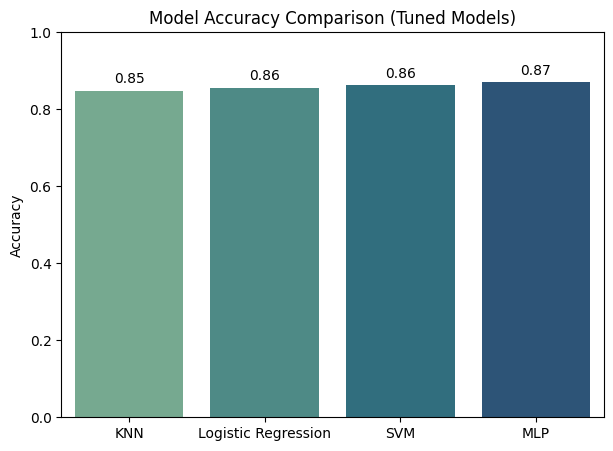

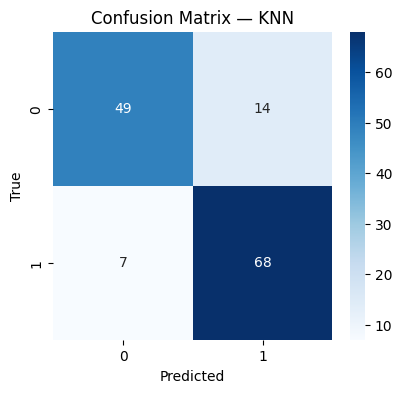

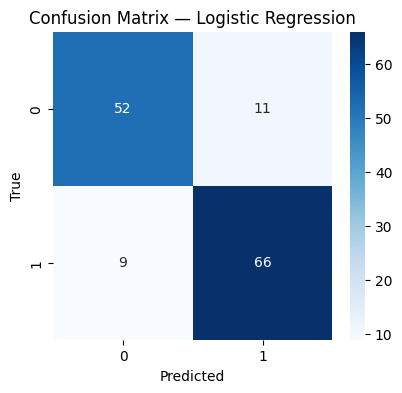

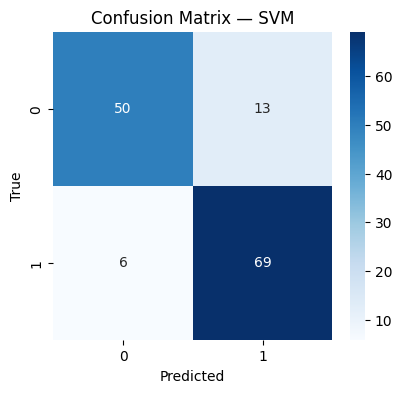

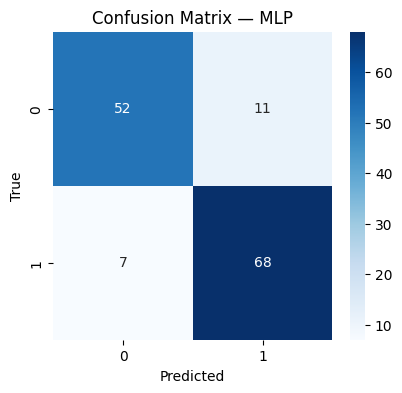

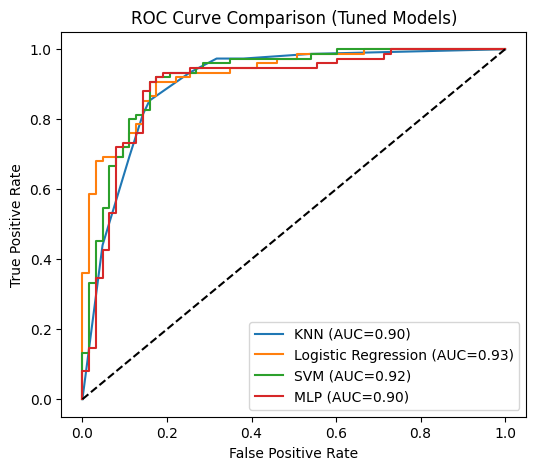

In [8]:
# ======================================
# Supporting Diagrams — Model Results
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import numpy as np

# Store results for later plotting
model_names = []
accuracies = []
conf_matrices = {}

for name, model in final_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# ------------------------------------------
# 1. Bar Chart — Accuracy Comparison
# ------------------------------------------
plt.figure(figsize=(7,5))
sns.barplot(x=model_names, y=accuracies, palette="crest")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Tuned Models)")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

# ------------------------------------------
# 2. Confusion Matrices for Each Model
# ------------------------------------------
for name in final_models.keys():
    plt.figure(figsize=(4.5,4))
    sns.heatmap(conf_matrices[name], annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

# ------------------------------------------
# 3. ROC Curves (if probabilities available)
# ------------------------------------------
plt.figure(figsize=(6,5))

for name, model in final_models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            # SVM uses decision_function
            y_prob = model.decision_function(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
    except:
        print(f"Skipping ROC for {name} (no probability output)")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Tuned Models)")
plt.legend()
plt.show()

# ------------------------------------------
# End of Supporting Diagrams — Model Results
# ------------------------------------------
